# Projet 3 : Analyse de séquences génomiques

In [1]:
import Projet_Bioinfo as pb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

import projet

## Préliminaires : données et lecture des fichiers

#### Question 1

In [3]:
for filename in ["sequences/regulatory_seq_PHO.fasta",
                 "sequences/regulatory_seqs_GAL.fasta",
                 "sequences/regulatory_seqs_MET.fasta",
                 "sequences/yeast_s_cerevisae_genomic_chr1-4.fna"]:
    dico_chro = pb.read_fasta(filename)
    total = 0
    for chrome in dico_chro:
        total += sum(pb.nucleotide_count(dico_chro[chrome]))
    print("Fichier {} : {} séquences, {} nucléotides.".format(filename, len(dico_chro.keys()), total))

Fichier sequences/regulatory_seq_PHO.fasta : 5 séquences, 4000 nucléotides.
Fichier sequences/regulatory_seqs_GAL.fasta : 7 séquences, 5608 nucléotides.
Fichier sequences/regulatory_seqs_MET.fasta : 9 séquences, 7200 nucléotides.
Fichier sequences/yeast_s_cerevisae_genomic_chr1-4.fna : 4 séquences, 2515853 nucléotides.


#### Question 2

In [4]:
dico_chro = pb.read_fasta("sequences/yeast_s_cerevisae_genomic_chr1-4.fna")
liste_gen = []
for chrome in dico_chro:
    liste_gen += dico_chro[chrome] 

a, c, g, t = pb.nucleotide_frequency(liste_gen)
print("Fréquence des nucléotides :")
print("A : {:.5f}".format(a))
print("C : {:.5f}".format(c))
print("G : {:.5f}".format(g))
print("T : {:.5f}".format(t))

Fréquence des nucléotides :
A : 0.29984
C : 0.20110
G : 0.20000
T : 0.29907


#### Question 3

Test de la fonction `logproba`.

In [5]:
p_log = projet.logproba(liste_gen, (a,c,g,t))
print("Log-probabilité de la séquence dans liste_gen :", p_log)
p_log = projet.logproba([pb.nucleotide[i] for i in "CGT"], (a,c,g,t))
print("Log_probabilité de la séquence CGT :", p_log)

Log-probabilité de la séquence dans liste_gen : -3438164.462646954
Log_probabilité de la séquence CGT : -4.420488639322931


#### Question 4

Test de la fonction `logprobafast`.

In [6]:
p_log_fast = projet.logprobafast(pb.nucleotide_count(liste_gen), (a,c,g,t))
print("Log-probabilité de la séquence dans liste_gen :", p_log_fast)
p_log_fast = projet.logprobafast([0, 1, 1, 1], (a,c,g,t))
print("Log_probabilité de la séquence CGT :", p_log_fast)

Log-probabilité de la séquence dans liste_gen : -3438164.4626395022
Log_probabilité de la séquence CGT : -4.420488639322931


## Annotation des régions promoteurs

### Description Empirique, préliminaires

Création des listes de nucléotides à partir des trois fichiers.

In [7]:
dico_PHO = pb.read_fasta("sequences/regulatory_seq_PHO.fasta")
dico_GAL = pb.read_fasta("sequences/regulatory_seqs_GAL.fasta")
dico_MET = pb.read_fasta("sequences/regulatory_seqs_MET.fasta")

liste_PHO = []
liste_GAL = []
liste_MET = []

for code in dico_PHO:
    liste_PHO += dico_PHO[code]
    
for code in dico_GAL:
    liste_GAL += dico_GAL[code]
    
for code in dico_MET:
    liste_MET += dico_MET[code]    

#### Question 1(a)
Test de la fonction `code`.

In [8]:
test = [3, 0, 1]
projet.code(test, len(test))

49

#### Question 1(b)
Test de la fonction `inverse`.

In [9]:
projet.inverse(49, 3)

[3, 0, 1]

#### Question 1(c)

Test de la fonction `comptage`.

In [10]:
seq = "ATCATG"
print("Représentation par chaine de caractères :", projet.comptage(seq, 2))
seq = pb.encode_sequence(seq)
print("Représentation par liste d'entiers :", projet.comptage(seq, 2))

Représentation par chaine de caractères : {'AT': 2, 'TC': 1, 'CA': 1, 'TG': 1}
Représentation par liste d'entiers : {3: 2, 13: 1, 4: 1, 14: 1}


#### Question 2

In [11]:
print("Espérance du nombre d'occurences de chaque mot de taille 2 dans une séquence de taille 100 :")
for i, esp in enumerate(projet.comptage_attendu([a, c, g, t], 2, 100)):
    print("Mot {} : {:.4f}".format(projet.inverse(i, 2), esp))

Espérance du nombre d'occurences de chaque mot de taille 2 dans une séquence de taille 100 :
Mot [0, 0] : 8.9002
Mot [0, 1] : 5.9695
Mot [0, 2] : 5.9367
Mot [0, 3] : 8.8774
Mot [1, 0] : 5.9695
Mot [1, 1] : 4.0038
Mot [1, 2] : 3.9818
Mot [1, 3] : 5.9541
Mot [2, 0] : 5.9367
Mot [2, 1] : 3.9818
Mot [2, 2] : 3.9599
Mot [2, 3] : 5.9214
Mot [3, 0] : 8.8774
Mot [3, 1] : 5.9541
Mot [3, 2] : 5.9214
Mot [3, 3] : 8.8546


#### Question 3

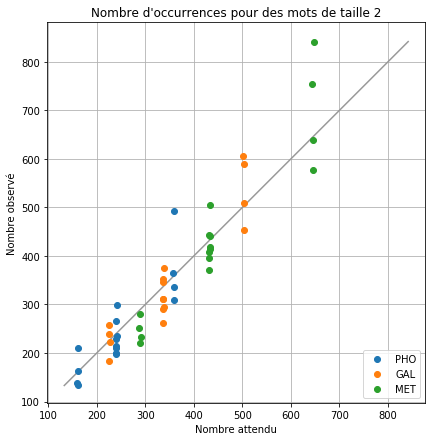

In [53]:
projet.graphe_occurrences((a, c, g, t), 2, {"PHO": liste_PHO, "GAL": liste_GAL, "MET": liste_MET},
                          "graphe_occurrences_2.png")

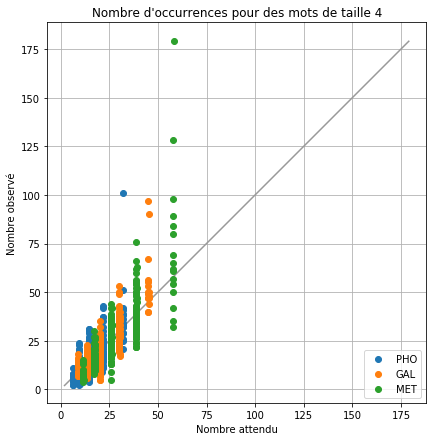

In [52]:
projet.graphe_occurrences((a, c, g, t), 4, {"PHO": liste_PHO, "GAL": liste_GAL, "MET": liste_MET},
                          "graphe_occurrences_4.png")

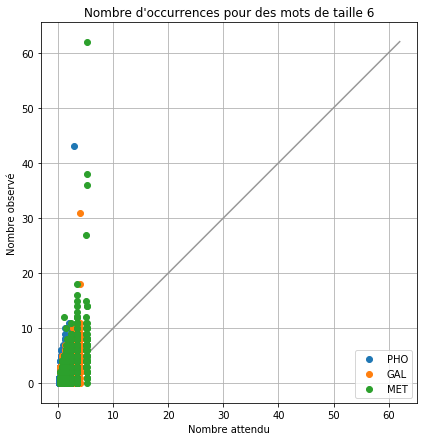

In [51]:
projet.graphe_occurrences((a, c, g, t), 6, {"PHO": liste_PHO, "GAL": liste_GAL, "MET": liste_MET},
                          "graphe_occurrences_6.png")

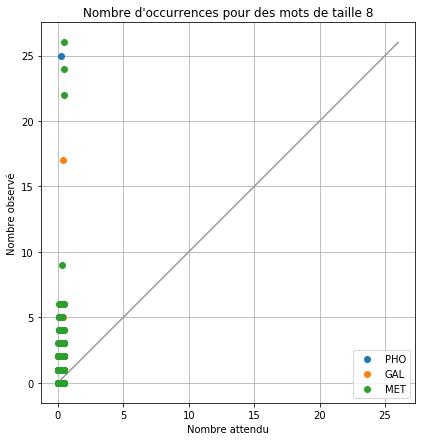

In [50]:
projet.graphe_occurrences((a, c, g, t), 8, {"PHO": liste_PHO, "GAL": liste_GAL, "MET": liste_MET},
                          "graphe_occurrences_8.png")

### Simulation de séquences aléatoires

#### Question 1

Test de la fonction `simule_sequence`.

In [45]:
test = projet.simule_sequence(1000000, (a, c, g, t))

#### Question 2
On fait le graphe avec les occurrences pour une séquence de longueur 1000000 et des mots de taille 6.

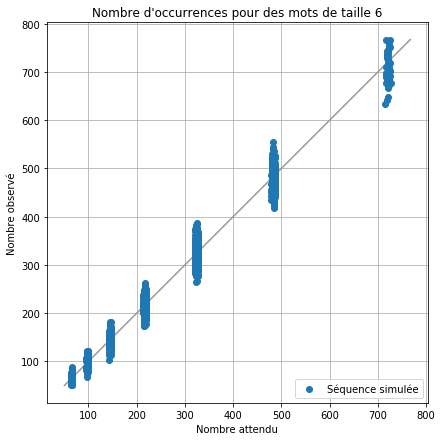

In [55]:
projet.graphe_occurrences((a, c, g, t), 6, {"Séquence simulée" : test}, "graphe_occurrences_simul.png")

#### Question 3
Test de la fonction `proba_empirique`.

In [60]:
probas = {}
for mot in ["ATCTGC", "ATATAT", "TTTAAA", "AAAAAA"]:
    print("Mot "+mot+":")
    probas[mot] = projet.proba_empirique(pb.encode_sequence(mot), 10000, (a, c, g, t), 1000)
    print(probas[mot])
    print("")

Mot ATCTGC:
{3: 0.193, 2: 0.275, 1: 0.224, 4: 0.123, 5: 0.047, 0: 0.121, 6: 0.009, 7: 0.006, 8: 0.001, 9: 0.001}

Mot ATATAT:
{12: 0.038, 8: 0.114, 13: 0.023, 7: 0.162, 4: 0.082, 6: 0.126, 11: 0.057, 3: 0.064, 9: 0.098, 5: 0.108, 10: 0.06, 14: 0.009, 16: 0.006, 1: 0.01, 15: 0.009, 2: 0.032, 20: 0.001, 19: 0.001}

Mot TTTAAA:
{9: 0.128, 13: 0.015, 5: 0.122, 8: 0.141, 10: 0.073, 12: 0.036, 11: 0.052, 7: 0.152, 6: 0.133, 4: 0.073, 2: 0.011, 3: 0.038, 14: 0.012, 16: 0.003, 15: 0.003, 1: 0.004, 18: 0.002, 17: 0.001, 19: 0.001}

Mot AAAAAA:
{5: 0.101, 4: 0.109, 8: 0.111, 10: 0.069, 6: 0.091, 12: 0.042, 11: 0.048, 3: 0.077, 9: 0.082, 7: 0.121, 2: 0.044, 13: 0.023, 1: 0.026, 18: 0.005, 17: 0.006, 14: 0.019, 15: 0.013, 16: 0.006, 0: 0.004, 19: 0.001, 20: 0.001, 25: 0.001}



#### Question 4

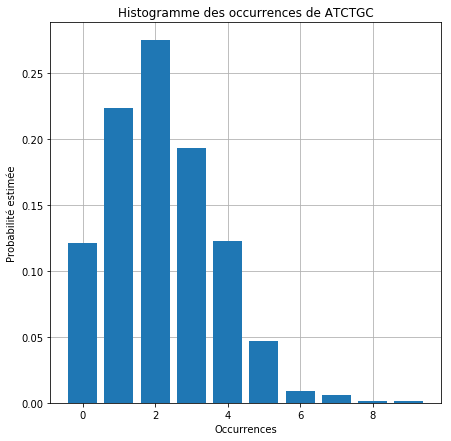

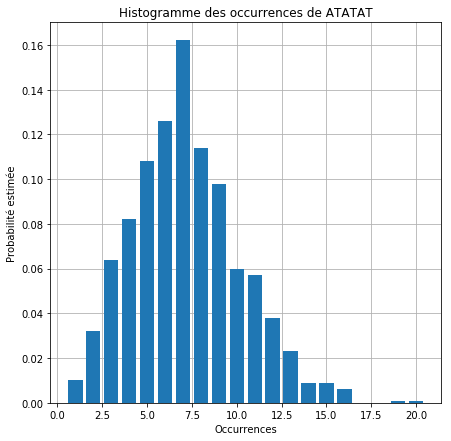

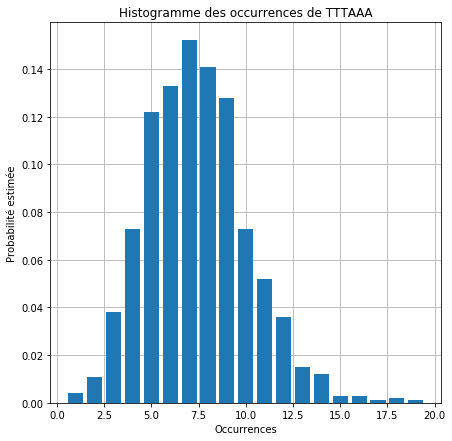

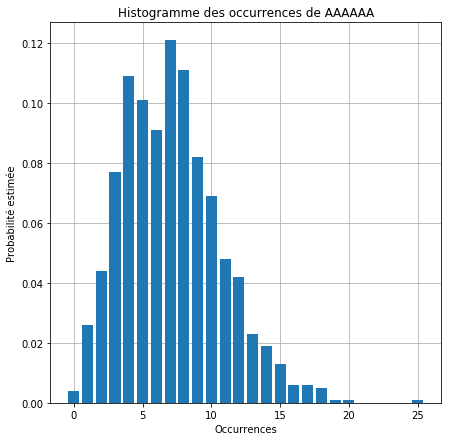

In [63]:
for mot in probas:
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.bar(probas[mot].keys(), probas[mot].values())
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.set_title("Histogramme des occurrences de "+mot)
    ax.set_xlabel("Occurrences")
    ax.set_ylabel("Probabilité estimée")
    fig.savefig("Rapport/Figures/histogramme_"+mot+".png")

#### Question 5

On représente graphiquement les intervalles de confiance avec des lignes sur les barres.

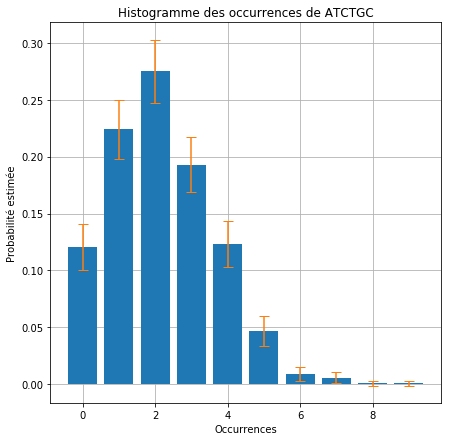

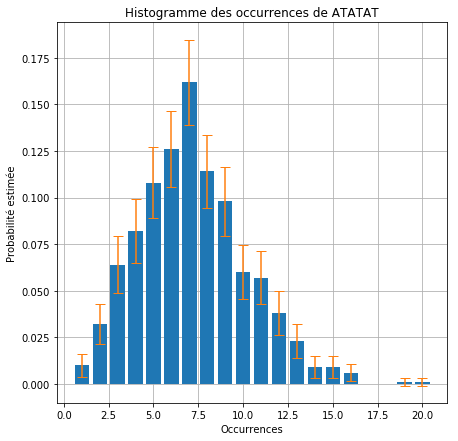

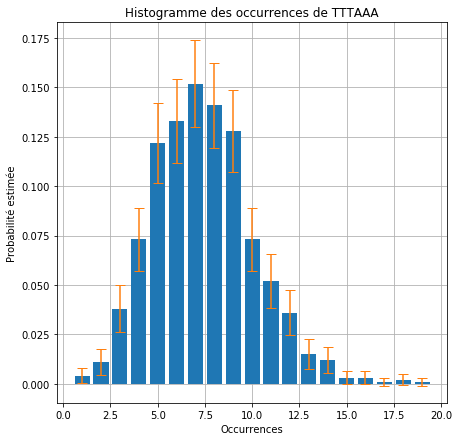

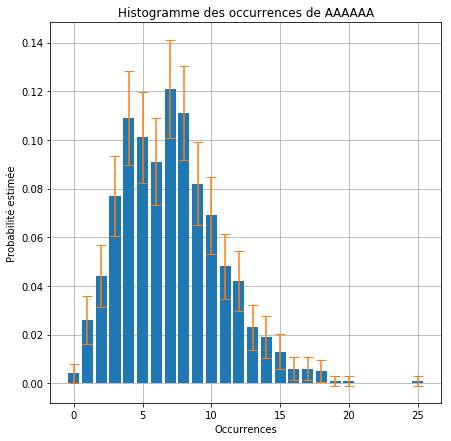

In [75]:
N = 1000 # Valeur utilisée dans le calcul de la probabilité empirique.
for mot in probas:
    fig, ax = plt.subplots(figsize=(7, 7))
    keys = np.array([x for x in probas[mot].keys()])
    vals = np.array([x for x in probas[mot].values()])
    ax.bar(keys, vals, yerr=1.96*np.sqrt(vals*(1-vals)/N), ecolor="C1", capsize=5)
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.set_title("Histogramme des occurrences de "+mot)
    ax.set_xlabel("Occurrences")
    ax.set_ylabel("Probabilité estimée")
    fig.savefig("Rapport/Figures/histogramme_"+mot+"_errorbar.png")